# ICA (Independent Component Analysis)

Utilizaremos ICA como herramienta para separar señales.

El archivo de audio se obtuvo del siguiente link:

https://www.kaggle.com/code/chittalpatel/ica-the-musical-way/input

El audio es monocanal y será necesario samplearlo.

In [42]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import wave
from IPython.display import Audio

In [43]:
audio_path = "ICA mix 1.wav"
audio = wave.open(audio_path, "r")
audio.getparams()

_wave_params(nchannels=1, sampwidth=2, framerate=44100, nframes=264515, comptype='NONE', compname='not compressed')

In [44]:
# duracion

framerate = audio.getframerate()

print("El audio dura: ", audio.getnframes() / framerate, "segundos")

El audio dura:  5.998072562358277 segundos


In [45]:
Audio(audio_path)

In [46]:
audio_ = audio.readframes(-1)
np_audio = np.frombuffer(audio_, np.int16)
np_audio.shape


(264515,)

In [47]:
np_audio

array([  879,  1268,  1460, ...,  9204,  9553, 10006], dtype=int16)

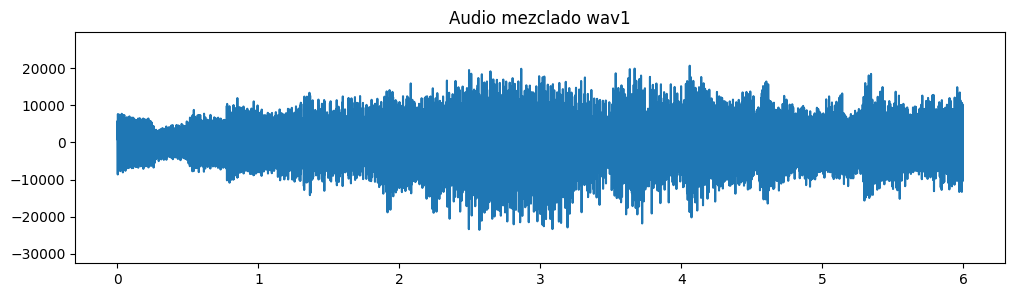

In [48]:
time = np.linspace(0, len(np_audio)/framerate, num=len(np_audio))

plt.figure(figsize=(12, 3))
plt.plot(time, np_audio)
plt.ylim(np_audio.min()-9000, np_audio.max()+9000)
plt.title("Audio mezclado wav1")
plt.show()

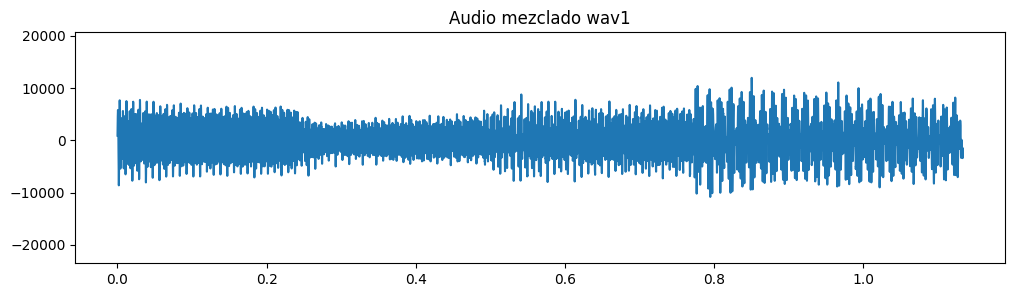

In [49]:
# Plots
time = np.linspace(0, len(np_audio[:50000])/framerate, num=len(np_audio[:50000]))

plt.figure(figsize=(12, 3))
plt.plot(time, np_audio[:50000])
plt.ylim(np_audio.min(), np_audio.max())
plt.title("Audio mezclado wav1")
plt.show()

In [50]:
audio2_path = "ICA mix 2.wav"
audio3_path = "ICA mix 3.wav"

audio2 = wave.open(audio2_path, "r")
audio3 = wave.open(audio3_path, "r")

print("Audio2 params: " , audio2.getparams())
print("Audio3 params: " , audio3.getparams())

np_audio2 = np.frombuffer(audio2.readframes(-1), np.int16)
np_audio3 = np.frombuffer(audio3.readframes(-1), np.int16)

Audio2 params:  _wave_params(nchannels=1, sampwidth=2, framerate=44100, nframes=264515, comptype='NONE', compname='not compressed')
Audio3 params:  _wave_params(nchannels=1, sampwidth=2, framerate=44100, nframes=264515, comptype='NONE', compname='not compressed')


In [51]:
Audio(audio2_path)

In [52]:
Audio(audio3_path)

In [53]:
X = np.dstack([np_audio, np_audio2, np_audio3])[0]
X.shape

(264515, 3)

In [54]:
X

array([[  879,   157,   879],
       [ 1268,   899,  2584],
       [ 1460,  1610,  4081],
       ...,
       [ 9204, 13386, 23756],
       [ 9553, 14016, 25031],
       [10006, 14596, 26333]], dtype=int16)

------------

In [55]:
from sklearn.decomposition import FastICA

ica = FastICA(n_components=3)

ica_result = ica.fit_transform(X)

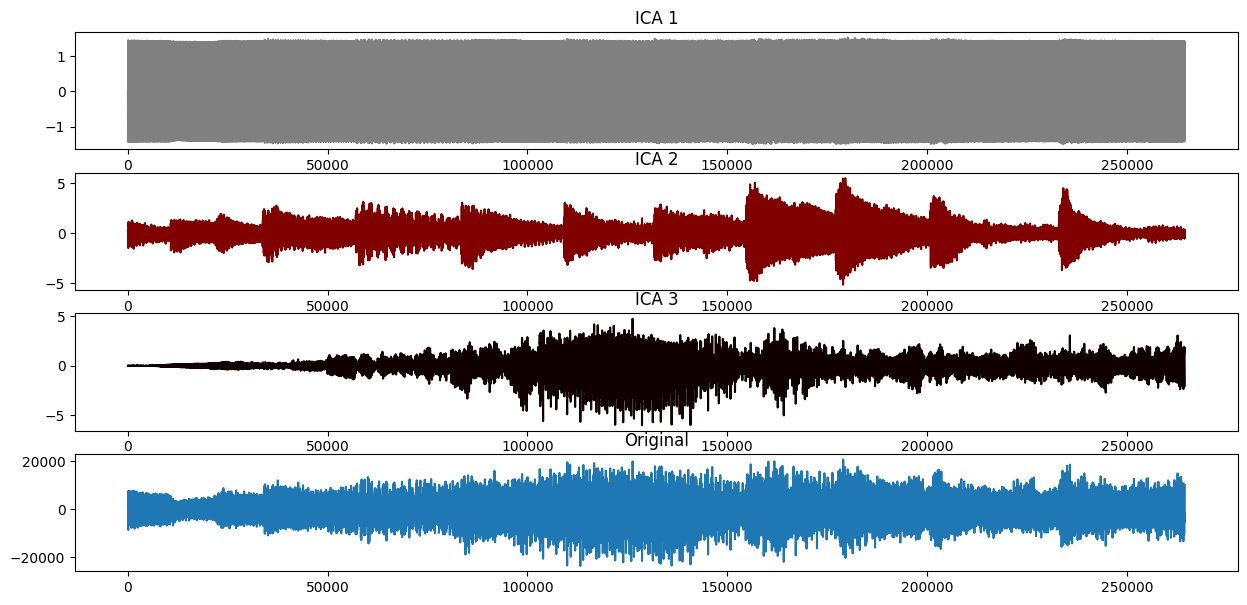

In [56]:
ica1 = ica_result[:, 0]
ica2 = ica_result[:, 1]
ica3 = ica_result[:, 2]

fig, ax = plt.subplots(4, 1)


ax[0].set_title("ICA 1")
ax[0].plot(ica1, "#808080")

ax[1].set_title("ICA 2")
ax[1].plot(ica2, "#800000")

ax[2].set_title("ICA 3")
ax[2].plot(ica3, "#100000")

ax[3].set_title("Original")
ax[3].plot(np_audio)

fig.set_size_inches(15, 7)
plt.show()

In [69]:
wav_1 = np.int16(ica1 * 500)
wav_2 = np.int16(ica2 * 5000)
wav_3 = np.int16(ica3 * 5_000)

#
from scipy.io import wavfile

wavfile.write("ruido.wav", framerate, wav_1)
wavfile.write("piano.wav", framerate, wav_2)
wavfile.write("cello.wav", framerate, wav_3)

In [70]:
Audio("ruido.wav")

In [71]:
Audio("cello.wav")

In [72]:
Audio("piano.wav")